In [16]:
import requests
import pandas as pd
import numpy as np
import datetime

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

url = "https://api.spacexdata.com/v4/capsules"
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
df


,reuse_count,water_landings,land_landings,last_update,launches,serial,status,type,id
0,0,1,0,Hanging in atrium at SpaceX HQ in Hawthorne,[5eb87cdeffd86e000604b330],C101,retired,Dragon 1.0,5e9e2c5bf35918ed873b2664
1,0,1,0,On display at KSC Visitor's Center,[5eb87cdfffd86e000604b331],C102,retired,Dragon 1.0,5e9e2c5bf3591882af3b2665
2,0,1,0,Location and status unknown,[5eb87ce0ffd86e000604b332],C103,unknown,Dragon 1.0,5e9e2c5bf3591835983b2666
3,0,1,0,Location and status unknown,[5eb87ce1ffd86e000604b333],C104,unknown,Dragon 1.0,5e9e2c5bf359189ef23b2667
4,0,1,0,Location and status unknown,[5eb87ce4ffd86e000604b337],C105,unknown,Dragon 1.1,5e9e2c5bf3591859a63b2668
5,2,3,0,"As of January 8, 2020: Arrived at Port of LA after splashdown following CRS-19 mission","[5eb87ce7ffd86e000604b33b, 5eb87d03ffd86e000604b352, 5eb87d39ffd86e000604b37e]",C106,active,Dragon 1.1,5e9e2c5bf3591880643b2669
6,0,1,0,Location and status unknown,[5eb87ce8ffd86e000604b33c],C107,unknown,Dragon 1.1,5e9e2c5bf35918165f3b266a
7,2,3,0,"As of August 29, 2019: Arrived at Port of LA after splashdown following CRS-18 mission","[5eb87cecffd86e000604b33f, 5eb87d0effd86e000604b35c, 5eb87d36ffd86e000604b37b]",C108,active,Dragon 1.1,5e9e2c5cf359188bfb3b266b
8,0,1,0,Destroyed on impact after F9 launch failure,[5eb87ceeffd86e000604b341],C109,destroyed,Dragon 1.1,5e9e2c5cf35918407d3b266c
9,1,2,0,Location and status unknown,"[5eb87cf3ffd86e000604b345, 5eb87d16ffd86e000604b364]",C110,active,Dragon 1.1,5e9e2c5cf3591885d43b266d


In [12]:
import requests

url = "https://api.spacexdata.com/v4/capsules"
response = requests.get(url)
data = response.json()
print(data)


[{'reuse_count': 0, 'water_landings': 1, 'land_landings': 0, 'last_update': 'Hanging in atrium at SpaceX HQ in Hawthorne ', 'launches': ['5eb87cdeffd86e000604b330'], 'serial': 'C101', 'status': 'retired', 'type': 'Dragon 1.0', 'id': '5e9e2c5bf35918ed873b2664'}, {'reuse_count': 0, 'water_landings': 1, 'land_landings': 0, 'last_update': "On display at KSC Visitor's Center ", 'launches': ['5eb87cdfffd86e000604b331'], 'serial': 'C102', 'status': 'retired', 'type': 'Dragon 1.0', 'id': '5e9e2c5bf3591882af3b2665'}, {'reuse_count': 0, 'water_landings': 1, 'land_landings': 0, 'last_update': 'Location and status unknown', 'launches': ['5eb87ce0ffd86e000604b332'], 'serial': 'C103', 'status': 'unknown', 'type': 'Dragon 1.0', 'id': '5e9e2c5bf3591835983b2666'}, {'reuse_count': 0, 'water_landings': 1, 'land_landings': 0, 'last_update': 'Location and status unknown', 'launches': ['5eb87ce1ffd86e000604b333'], 'serial': 'C104', 'status': 'unknown', 'type': 'Dragon 1.0', 'id': '5e9e2c5bf359189ef23b2667'}

In [21]:
df = pd.DataFrame(data)


In [23]:
import requests
import pandas as pd

# SpaceX launches ka data laao
url = "https://api.spacexdata.com/v4/launches"
response = requests.get(url).json()

# DataFrame banao
spacex_df = pd.DataFrame(response)

BoosterVersion = []

def getBoosterVersion(data):
    for rocket_id in data['rocket']:
        if rocket_id:
            url = f"https://api.spacexdata.com/v4/rockets/{rocket_id}"
            res = requests.get(url).json()
            BoosterVersion.append(res.get('name', 'Unknown'))
        else:
            BoosterVersion.append('Unknown')
    return BoosterVersion

spacex_df['Booster Version'] = getBoosterVersion(spacex_df)
spacex_df[['rocket','Booster Version']].head()


,rocket,Booster Version
0,5e9d0d95eda69955f709d1eb,Falcon 1
1,5e9d0d95eda69955f709d1eb,Falcon 1
2,5e9d0d95eda69955f709d1eb,Falcon 1
3,5e9d0d95eda69955f709d1eb,Falcon 1
4,5e9d0d95eda69955f709d1eb,Falcon 1


In [45]:
# landing_class = 0 if bad_outcome
# landing_class = 1 otherwise

In [47]:
df.head(5)

,reuse_count,water_landings,land_landings,last_update,launches,serial,status,type,id
0,0,1,0,Hanging in atrium at SpaceX HQ in Hawthorne,[5eb87cdeffd86e000604b330],C101,retired,Dragon 1.0,5e9e2c5bf35918ed873b2664
1,0,1,0,On display at KSC Visitor's Center,[5eb87cdfffd86e000604b331],C102,retired,Dragon 1.0,5e9e2c5bf3591882af3b2665
2,0,1,0,Location and status unknown,[5eb87ce0ffd86e000604b332],C103,unknown,Dragon 1.0,5e9e2c5bf3591835983b2666
3,0,1,0,Location and status unknown,[5eb87ce1ffd86e000604b333],C104,unknown,Dragon 1.0,5e9e2c5bf359189ef23b2667
4,0,1,0,Location and status unknown,[5eb87ce4ffd86e000604b337],C105,unknown,Dragon 1.1,5e9e2c5bf3591859a63b2668


In [50]:
import requests
import pandas as pd


In [51]:
# SpaceX launches API endpoint
launches_url = "https://api.spacexdata.com/v4/launches/past"

response = requests.get(launches_url)
response.raise_for_status()   # error aaye to exception throw karega

launches_json = response.json()
print(f"Total launches received: {len(launches_json)}")


Total launches received: 187


In [52]:
# JSON ko flat table (DataFrame) mein convert
df_launches = pd.json_normalize(launches_json)

# First few columns dekhlo
df_launches.head()


,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,capsules,payloads,launchpad,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,auto_update,tbd,launch_library_id,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/94/f2/NN6Ph45r_o.png,https://images2.imgbox.com/5b/02/QcxHUb5V_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]","Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdaffd86e000604b32b,False,False,False,[],https://images2.imgbox.com/f9/4a/ZboXReNb_o.png,https://images2.imgbox.com/80/a2/bkWotCIS_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]",Residual stage 1 thrust led to collision between stage 1 and stage 2,[],[],[],"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdbffd86e000604b32c,False,False,False,[],https://images2.imgbox.com/6c/cb/na1tzhHs_o.png,https://images2.imgbox.com/4a/80/k1oAkY0k_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1-flight-3-mission-summary,https://en.wikipedia.org/wiki/Trailblazer_(satellite),NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],"Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1",[],[],[],[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,4,RatSat,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,"[{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': 

In [53]:
# Rockets endpoint se Falcon 9 rocket ka ID nikaalna
rockets_url = "https://api.spacexdata.com/v4/rockets"
rockets_resp = requests.get(rockets_url)
rockets_resp.raise_for_status()

rockets = rockets_resp.json()
rocket_df = pd.json_normalize(rockets)

# Falcon 9 ka ID dhoondo
falcon9_id = rocket_df.loc[rocket_df['name'] == 'Falcon 9', 'id'].iloc[0]
falcon9_id


'5e9d0d95eda69973a809d1ec'

In [55]:
# Sirf Falcon 9 launches filter karo
df_falcon9 = df_launches[df_launches['rocket'] == falcon9_id].copy()
df_falcon9.shape


(179, 43)

In [56]:
# Kuch important columns choose karte hain
columns_needed = [
    'name',            # mission name
    'date_utc',        # launch date/time
    'rocket',          # rocket id
    'success',         # launch success or not (True/False/None)
    'cores',           # cores info (list)
    'payloads',        # payload ids
    'launchpad',       # launchpad id
    'details'          # description (if available)
]

df_falcon9_small = df_falcon9[columns_needed].copy()
df_falcon9_small.head()


,name,date_utc,rocket,success,cores,payloads,launchpad,details
5,Falcon 9 Test Flight,2010-06-04T18:45:00.000Z,5e9d0d95eda69973a809d1ec,True,"[{'core': '5e9e289ef359185f2b3b2628', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",[5eb0e4b7b6c3bb0006eeb1e7],5e9e4501f509094ba4566f84,None
6,COTS 1,2010-12-08T15:43:00.000Z,5e9d0d95eda69973a809d1ec,True,"[{'core': '5e9e289ef35918187c3b2629', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]","[5eb0e4b9b6c3bb0006eeb1e8, 5eb0e4b9b6c3bb0006eeb1e9]",5e9e4501f509094ba4566f84,None
7,COTS 2,2012-05-22T07:44:00.000Z,5e9d0d95eda69973a809d1ec,True,"[{'core': '5e9e289ef35918f39c3b262a', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",[5eb0e4bab6c3bb0006eeb1ea],5e9e4501f509094ba4566f84,"Launch was scrubbed on first attempt, second launch attempt was successful"
8,CRS-1,2012-10-08T00:35:00.000Z,5e9d0d95eda69973a809d1ec,True,"[{'core': '5e9e289ff3591821a73b262b', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]","[5eb0e4bab6c3bb0006eeb1eb, 5eb0e4bab6c3bb0006eeb1ec]",5e9e4501f509094ba4566f84,"CRS-1 successful, but the secondary payload was inserted into abnormally low orbit and lost due to Falcon 9 boost stage engine failure, ISS visiting vehicle safety rules, and the primary payload owner's contractual right to decline a second ignition of the second stage under some conditions."
9,CRS-2,2013-03-01T19:10:00.000Z,5e9d0d95eda69973a809d1ec,True,"[{'core': '5e9e289ff3591884e03b262c', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",[5eb0e4bbb6c3bb0006eeb1ed],5e9e4501f509094ba4566f84,Last launch of the original Falcon 9 v1.0 launch vehicle


In [57]:
def extract_core_info(core_list, key):
    """
    core_list: list of dicts (cores)
    key: which key to extract from first core (e.g. 'landing_type', 'landing_success')
    """
    if isinstance(core_list, list) and len(core_list) > 0 and isinstance(core_list[0], dict):
        return core_list[0].get(key)
    return None

df_falcon9_small['landing_type'] = df_falcon9_small['cores'].apply(lambda x: extract_core_info(x, 'landing_type'))
df_falcon9_small['landing_success'] = df_falcon9_small['cores'].apply(lambda x: extract_core_info(x, 'landing_success'))

# ab unnecessary 'cores' column hata do
df_falcon9_small.drop(columns=['cores'], inplace=True)

df_falcon9_small.head()


,name,date_utc,rocket,success,payloads,launchpad,details,landing_type,landing_success
5,Falcon 9 Test Flight,2010-06-04T18:45:00.000Z,5e9d0d95eda69973a809d1ec,True,[5eb0e4b7b6c3bb0006eeb1e7],5e9e4501f509094ba4566f84,None,None,None
6,COTS 1,2010-12-08T15:43:00.000Z,5e9d0d95eda69973a809d1ec,True,"[5eb0e4b9b6c3bb0006eeb1e8, 5eb0e4b9b6c3bb0006eeb1e9]",5e9e4501f509094ba4566f84,None,None,None
7,COTS 2,2012-05-22T07:44:00.000Z,5e9d0d95eda69973a809d1ec,True,[5eb0e4bab6c3bb0006eeb1ea],5e9e4501f509094ba4566f84,"Launch was scrubbed on first attempt, second launch attempt was successful",None,None
8,CRS-1,2012-10-08T00:35:00.000Z,5e9d0d95eda69973a809d1ec,True,"[5eb0e4bab6c3bb0006eeb1eb, 5eb0e4bab6c3bb0006eeb1ec]",5e9e4501f509094ba4566f84,"CRS-1 successful, but the secondary payload was inserted into abnormally low orbit and lost due to Falcon 9 boost stage engine failure, ISS visiting vehicle safety rules, and the primary payload owner's contractual right to decline a second ignition of the second stage under some conditions.",None,None
9,CRS-2,2013-03-01T19:10:00.000Z,5e9d0d95eda69973a809d1ec,True,[5eb0e4bbb6c3bb0006eeb1ed],5e9e4501f509094ba4566f84,Last launch of the original Falcon 9 v1.0 launch vehicle,None,None


In [58]:
# Launchpads data load karo
launchpads_url = "https://api.spacexdata.com/v4/launchpads"
launchpads_resp = requests.get(launchpads_url)
launchpads_resp.raise_for_status()

launchpads = launchpads_resp.json()
df_launchpads = pd.json_normalize(launchpads)

# id → name mapping
launchpad_map = dict(zip(df_launchpads['id'], df_launchpads['name']))

df_falcon9_small['launch_site'] = df_falcon9_small['launchpad'].map(launchpad_map)

# id wala 'launchpad' column hata sakte ho (optional)
df_falcon9_small.drop(columns=['launchpad'], inplace=True)

df_falcon9_small[['name', 'date_utc', 'launch_site', 'success', 'landing_type', 'landing_success']].head()


,name,date_utc,launch_site,success,landing_type,landing_success
5,Falcon 9 Test Flight,2010-06-04T18:45:00.000Z,CCSFS SLC 40,True,None,None
6,COTS 1,2010-12-08T15:43:00.000Z,CCSFS SLC 40,True,None,None
7,COTS 2,2012-05-22T07:44:00.000Z,CCSFS SLC 40,True,None,None
8,CRS-1,2012-10-08T00:35:00.000Z,CCSFS SLC 40,True,None,None
9,CRS-2,2013-03-01T19:10:00.000Z,CCSFS SLC 40,True,None,None


In [59]:
output_file = "spacex_falcon9_launches_clean.csv"
df_falcon9_small.to_csv(output_file, index=False)
print(f"Cleaned Falcon 9 launches dataset saved to: {output_file}")


Cleaned Falcon 9 launches dataset saved to: spacex_falcon9_launches_clean.csv


In [64]:
!pip install graphviz


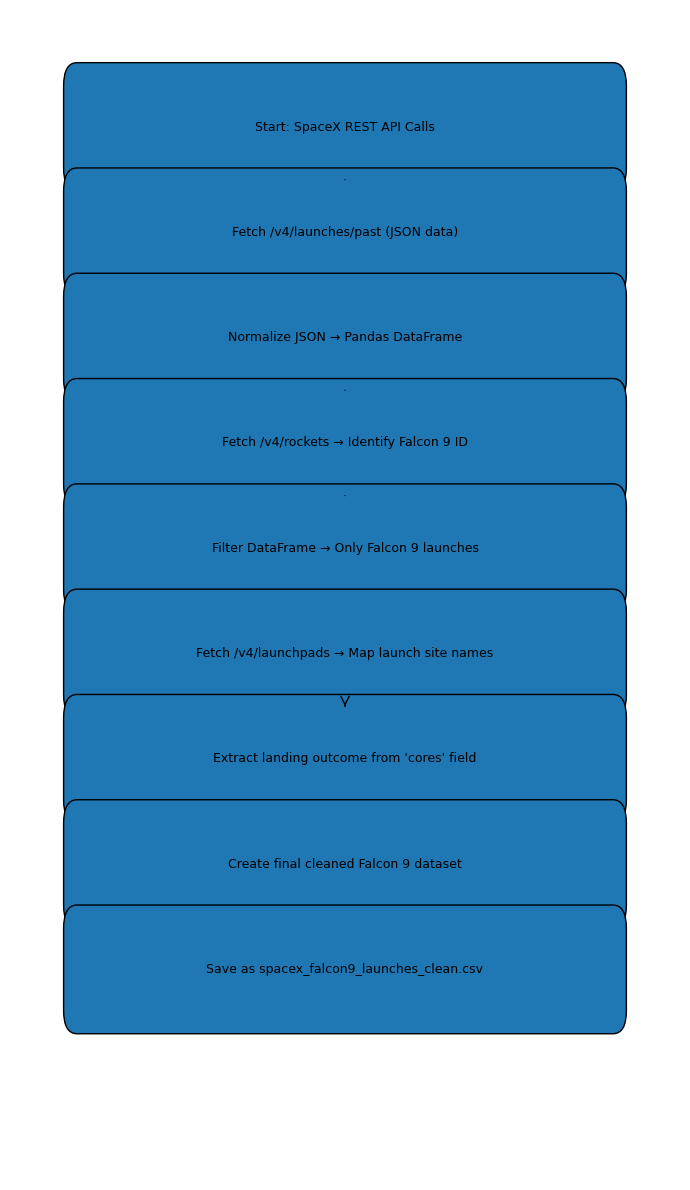

In [66]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

# Steps of your SpaceX API pipeline
steps = [
    "Start: SpaceX REST API Calls",
    "Fetch /v4/launches/past (JSON data)",
    "Normalize JSON → Pandas DataFrame",
    "Fetch /v4/rockets → Identify Falcon 9 ID",
    "Filter DataFrame → Only Falcon 9 launches",
    "Fetch /v4/launchpads → Map launch site names",
    "Extract landing outcome from 'cores' field",
    "Create final cleaned Falcon 9 dataset",
    "Save as spacex_falcon9_launches_clean.csv"
]

fig, ax = plt.subplots(figsize=(7, 12))

# Basic layout settings
x_box = 0.5          # sab boxes center line par
y_start = 0.9
y_step = 0.09

boxes = []

for i, text in enumerate(steps):
    y = y_start - i * y_step
    # Rounded rectangle (box)
    box = FancyBboxPatch(
        (x_box - 0.4, y - 0.035),  # (x, y)
        0.8, 0.07,                 # width, height
        boxstyle="round,pad=0.02",
        linewidth=1
    )
    ax.add_patch(box)
    boxes.append((x_box, y))

    # Text inside box
    ax.text(x_box, y, text,
            ha="center", va="center", wrap=True, fontsize=9)

# Arrows between boxes
for i in range(len(boxes) - 1):
    (x1, y1) = boxes[i]
    (x2, y2) = boxes[i + 1]
    arrow = FancyArrowPatch(
        (x1, y1 - 0.045),
        (x2, y2 + 0.045),
        arrowstyle="->",
        mutation_scale=15,
        linewidth=1
    )
    ax.add_patch(arrow)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis("off")

plt.tight_layout()

# Save as PNG for PowerPoint
plt.savefig("spacex_api_flowchart.png", dpi=200, bbox_inches="tight")
plt.show()


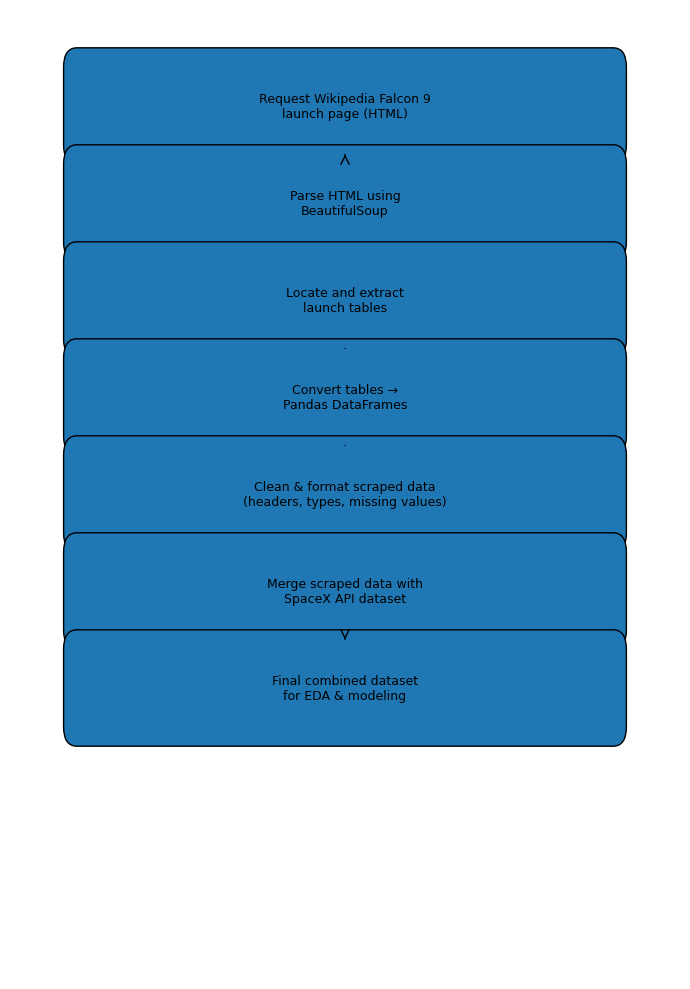

In [67]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

steps = [
    "Request Wikipedia Falcon 9\nlaunch page (HTML)",
    "Parse HTML using\nBeautifulSoup",
    "Locate and extract\nlaunch tables",
    "Convert tables →\nPandas DataFrames",
    "Clean & format scraped data\n(headers, types, missing values)",
    "Merge scraped data with\nSpaceX API dataset",
    "Final combined dataset\nfor EDA & modeling"
]

fig, ax = plt.subplots(figsize=(7, 10))

x_box = 0.5
y_start = 0.9
y_step = 0.1

boxes = []

for i, text in enumerate(steps):
    y = y_start - i * y_step
    box = FancyBboxPatch(
        (x_box - 0.4, y - 0.04),
        0.8, 0.08,
        boxstyle="round,pad=0.02",
        linewidth=1
    )
    ax.add_patch(box)
    boxes.append((x_box, y))
    ax.text(x_box, y, text, ha="center", va="center", wrap=True, fontsize=9)

for i in range(len(boxes) - 1):
    (x1, y1) = boxes[i]
    (x2, y2) = boxes[i + 1]
    arrow = FancyArrowPatch(
        (x1, y1 - 0.05),
        (x2, y2 + 0.05),
        arrowstyle="->",
        mutation_scale=15,
        linewidth=1
    )
    ax.add_patch(arrow)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis("off")

plt.tight_layout()
plt.savefig("web_scraping_flowchart.png", dpi=200, bbox_inches="tight")
plt.show()


In [70]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Wikipedia static URL
static_url = "https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/91.0.4472.124 Safari/537.36"
}

# Step 1: Request HTML page
response = requests.get(static_url, headers=headers)
response.raise_for_status()

# Step 2: Parse HTML
soup = BeautifulSoup(response.text, 'html.parser')

# Step 3: Extract all tables
tables = soup.find_all("table", class_="wikitable")

print("Total tables found:", len(tables))

# Step 4: Convert tables to DataFrames
df_list = []
for table in tables:
    df = pd.read_html(str(table))[0]
    df_list.append(df)

print(f"Extracted {len(df_list)} tables")

# Step 5: Combine tables vertically
df_scraped = pd.concat(df_list, ignore_index=True)

# Step 6: Clean column names
df_scraped.columns = df_scraped.columns.str.replace('\n', ' ').str.strip()

# Step 7: Remove rows where first column is "Date" (repeated headers)
df_scraped = df_scraped[df_scraped[df_scraped.columns[0]] != "Date"].reset_index(drop=True)

print("Scraped dataset shape:", df_scraped.shape)
df_scraped.head()


Total tables found: 13


C:\Users\sonam\AppData\Local\Temp\ipykernel_25388\3641660138.py:29: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\sonam\AppData\Local\Temp\ipykernel_25388\3641660138.py:29: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\sonam\AppData\Local\Temp\ipykernel_25388\3641660138.py:29: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\sonam\AppData\Local\Temp\ipykernel_25388\3641660138.py:29: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read fr

Extracted 13 tables
Scraped dataset shape: (415, 11)


,Flight No.,Date and time (UTC),"Version, Booster [b]",Launch site,Payload[c],Payload mass,Orbit,Customer,Launch outcome,Booster landing,"Version, Booster[b]"
0,1,"4 June 2010, 18:45",F9 v1.0[7] B0003.1[8],"CCAFS, SLC-40",Dragon Spacecraft Qualification Unit,NaN,LEO,SpaceX,Success,Failure[9][10] (parachute),NaN
1,1,"First flight of Falcon 9 v1.0.[11] Used a boilerplate version of Dragon capsule which was not designed to separate from the second stage.(more details below) Attempted to recover the first stage by parachuting it into the ocean, but it burned up on reentry, before the parachutes even deployed.[12]","First flight of Falcon 9 v1.0.[11] Used a boilerplate version of Dragon capsule which was not designed to separate from the second stage.(more details below) Attempted to recover the first stage by parachuting it into the ocean, but it burned up on reentry, before the parachutes even deployed.[12]","First flight of Falcon 9 v1.0.[11] Used a boilerplate version of Dragon capsule which was not designed to separate from the second stage.(more details below) Attempted to recover the first stage by parachuting it into the ocean, but it burned up on reentry, before the parachutes even deployed.[12]","First flight of Falcon 9 v1.0.[11] Used a boilerplate version of Dragon capsule which was not designed to separate from the second stage.(more details below) Attempted to recover the first stage by parachuting it into the ocean, but it burned up on reentry, before the parachutes even deployed.[12]","First flight of Falcon 9 v1.0.[11] Used a boilerplate version of Dragon capsule which was not designed to separate from the second stage.(more details below) Attempted to recover the first stage by parachuting it into the ocean, but it burned up on reentry, before the parachutes even deployed.[12]","First flight of Falcon 9 v1.0.[11] Used a boilerplate version of Dragon capsule which was not designed to separate from the second stage.(more details below) Attempted to recover the first stage by parachuting it into the ocean, but it burned up on reentry, before the parachutes even deployed.[12]","First flight of Falcon 9 v1.0.[11] Used a boilerplate version of Dragon capsule which was not designed to separate from the second stage.(more details below) Attempted to recover the first stage by parachuting it into the ocean, but it burned up on reentry, before the parachutes even deployed.[12]","First flight of Falcon 9 v1.0.[11] Used a boilerplate version of Dragon capsule which was not designed to separate from the second stage.(more details below) Attempted to recover the first stage by parachuting it into the ocean, but it burned up on reentry, before the parachutes even deployed.[12]","First flight of Falcon 9 v1.0.[11] Used a boilerplate version of Dragon capsule which was not designed to separate from the second stage.(more details below) Attempted to recover the first stage by parachuting it into the ocean, but it burned up on reentry, before the parachutes even deployed.[12]",NaN
2,2,"8 December 2010, 15:43[13]",F9 v1.0[7] B0004.1[8],"CCAFS, SLC-40",Dragon demo flight C1 (Dragon C101),NaN,LEO (ISS),NASA (COTS) NRO,Success[9],Failure[9][14] (parachute),NaN
3,2,"Maiden flight of Dragon capsule, consisting of over 3 hours of testing thruster maneuvering and reentry.[15] Attempted to recover the first stage by parachuting it into the ocean, but it disintegrated upon reentry, before the parachutes were deployed.[12] (more details below) It also included two CubeSats,[16] and a wheel of Brouère cheese.","Maiden flight of Dragon capsule, consisting of over 3 hours of testing thruster maneuvering and reentry.[15] Attempted to recover the first stage by parachuting it into the ocean, but it disintegrated upon reentry, before the parachutes were deployed.[12] (more details below) It also included two CubeSats,[16] and a wheel of Brouère cheese.","Maiden flight of Dragon capsule, consisting of over 3 hours of testing thruster maneuvering and 

In [71]:
df_scraped.to_csv("web_scraped_falcon9_launches.csv", index=False)
print("Scraped dataset saved as web_scraped_falcon9_launches.csv")

Scraped dataset saved as web_scraped_falcon9_launches.csv


In [72]:
import pandas as pd

api_df = pd.read_csv("spacex_falcon9_launches_clean.csv")
api_df.head()


,name,date_utc,rocket,success,payloads,details,landing_type,landing_success,launch_site
0,Falcon 9 Test Flight,2010-06-04T18:45:00.000Z,5e9d0d95eda69973a809d1ec,True,['5eb0e4b7b6c3bb0006eeb1e7'],NaN,NaN,NaN,CCSFS SLC 40
1,COTS 1,2010-12-08T15:43:00.000Z,5e9d0d95eda69973a809d1ec,True,"['5eb0e4b9b6c3bb0006eeb1e8', '5eb0e4b9b6c3bb0006eeb1e9']",NaN,NaN,NaN,CCSFS SLC 40
2,COTS 2,2012-05-22T07:44:00.000Z,5e9d0d95eda69973a809d1ec,True,['5eb0e4bab6c3bb0006eeb1ea'],"Launch was scrubbed on first attempt, second launch attempt was successful",NaN,NaN,CCSFS SLC 40
3,CRS-1,2012-10-08T00:35:00.000Z,5e9d0d95eda69973a809d1ec,True,"['5eb0e4bab6c3bb0006eeb1eb', '5eb0e4bab6c3bb0006eeb1ec']","CRS-1 successful, but the secondary payload was inserted into abnormally low orbit and lost due to Falcon 9 boost stage engine failure, ISS visiting vehicle safety rules, and the primary payload owner's contractual right to decline a second ignition of the second stage under some conditions.",NaN,NaN,CCSFS SLC 40
4,CRS-2,2013-03-01T19:10:00.000Z,5e9d0d95eda69973a809d1ec,True,['5eb0e4bbb6c3bb0006eeb1ed'],Last launch of the original Falcon 9 v1.0 launch vehicle,NaN,NaN,CCSFS SLC 40


In [ ]:
scraped_df = df_scraped.copy()

# Possible flight-number column rename
scraped_df.rename(
    columns={
        "#": "FlightNumber",
        "No.": "FlightNumber",
        "Flight No.": "FlightNumber"
    },
    inplace=True
)

# Make sure FlightNumber is numeric
scraped_df["FlightNumber"] = scraped_df["FlightNumber"].astype(int)

scraped_df[["FlightNumber"]].head()


In [77]:
api_df.columns


Index(['name', 'date_utc', 'rocket', 'success', 'payloads', 'details',
       'landing_type', 'landing_success', 'launch_site'],
      dtype='object')

In [78]:
scraped_df.columns


Index(['Flight No.', 'Date and time (UTC)', 'Version, Booster [b]',
       'Launch site', 'Payload[c]', 'Payload mass', 'Orbit', 'Customer',
       'Launch outcome', 'Booster landing', 'Version, Booster[b]'],
      dtype='object')

In [79]:
import pandas as pd

# api_df = API se aaya hua cleaned dataframe
# scraped_df = Wikipedia scraping se aaya hua dataframe

# 1) API wali date ko date-only bana do
api_df = api_df.copy()
api_df['date'] = pd.to_datetime(api_df['date_utc']).dt.date

# 2) Scraped wali date ko clean + date-only bana do
scraped_df = scraped_df.copy()

# Wikipedia date mein footnotes [1], [2] hote hain, unko hata dete hain
scraped_df['Date and time (UTC)_clean'] = (
    scraped_df['Date and time (UTC)']
      .astype(str)
      .str.replace(r"\[.*?\]", "", regex=True)  # remove [*] refs
      .str.strip()
)

scraped_df['date'] = pd.to_datetime(scraped_df['Date and time (UTC)_clean'],
                                    errors='coerce').dt.date

# 3) Ab merge karo: date + launch site ke base par
merged_df = pd.merge(
    api_df,
    scraped_df,
    how='left',
    left_on=['date', 'launch_site'],
    right_on=['date', 'Launch site'],
    suffixes=('_api', '_scraped')
)

print("API shape:", api_df.shape)
print("Scraped shape:", scraped_df.shape)
print("Merged shape:", merged_df.shape)

merged_df.head()


API shape: (179, 10)
Scraped shape: (415, 13)
Merged shape: (179, 22)


,name,date_utc,rocket,success,payloads,details,landing_type,landing_success,launch_site,date,Flight No.,Date and time (UTC),"Version, Booster [b]",Launch site,Payload[c],Payload mass,Orbit,Customer,Launch outcome,Booster landing,"Version, Booster[b]",Date and time (UTC)_clean
0,Falcon 9 Test Flight,2010-06-04T18:45:00.000Z,5e9d0d95eda69973a809d1ec,True,['5eb0e4b7b6c3bb0006eeb1e7'],NaN,NaN,NaN,CCSFS SLC 40,2010-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,COTS 1,2010-12-08T15:43:00.000Z,5e9d0d95eda69973a809d1ec,True,"['5eb0e4b9b6c3bb0006eeb1e8', '5eb0e4b9b6c3bb0006eeb1e9']",NaN,NaN,NaN,CCSFS SLC 40,2010-12-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,COTS 2,2012-05-22T07:44:00.000Z,5e9d0d95eda69973a809d1ec,True,['5eb0e4bab6c3bb0006eeb1ea'],"Launch was scrubbed on first attempt, second launch attempt was successful",NaN,NaN,CCSFS SLC 40,2012-05-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CRS-1,2012-10-08T00:35:00.000Z,5e9d0d95eda69973a809d1ec,True,"['5eb0e4bab6c3bb0006eeb1eb', '5eb0e4bab6c3bb0006eeb1ec']","CRS-1 successful, but the secondary payload was inserted into abnormally low orbit and lost due to Falcon 9 boost stage engine failure, ISS visiting vehicle safety rules, and the primary payload owner's contractual right to decline a second ignition of the second stage under some conditions.",NaN,NaN,CCSFS SLC 40,2012-10-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CRS-2,2013-03-01T19:10:00.000Z,5e9d0d95eda69973a809d1ec,True,['5eb0e4bbb6c3bb0006eeb1ed'],Last launch of the original Falcon 9 v1.0 launch vehicle,NaN,NaN,CCSFS SLC 40,2013-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
merged_df.to_csv("spacex_falcon9_api_scraped_merged.csv", index=False)
print("Merged dataset saved as spacex_falcon9_api_scraped_merged.csv")


Merged dataset saved as spacex_falcon9_api_scraped_merged.csv


In [81]:
!pip install sqlalchemy==1.3.9

  Using cached SQLAlchemy-1.3.9-cp313-cp313-win_amd64.whl
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.44
    Uninstalling SQLAlchemy-2.0.44:
      Successfully uninstalled SQLAlchemy-2.0.44


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.3.9 which is incompatible.


In [82]:
!pip install ipython-sql
!pip install ipython-sql prettytable

  Using cached sqlalchemy-2.0.44-cp313-cp313-win_amd64.whl.metadata (9.8 kB)
Using cached sqlalchemy-2.0.44-cp313-cp313-win_amd64.whl (2.1 MB)
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.3.9
    Uninstalling SQLAlchemy-1.3.9:
      Successfully uninstalled SQLAlchemy-1.3.9


In [83]:
%load_ext sql

In [84]:
import csv, sqlite3
import prettytable
prettytable.DEFAULT = 'DEFAULT'

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [85]:
!pip install -q pandas

In [86]:
%sql sqlite:///my_data1.db

In [87]:
import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

In [88]:
!pip3 install folium
!pip3 install wget
!pip3 install pandas

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9683 sha256=af64958c3e726239fbe91a1ac59744ae9b31ae7f93d1d6307ca6ec4c3b6fd318
  Stored in directory: c:\users\sonam\appdata\local\pip\cache\wheels\8a\b8\04\0c88fb22489b0c049bee4e977c5689c7fe597d6c4b0e7d0b6a
Successfully built wget


  DEPRECATION: Building 'wget' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'wget'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [89]:
import folium
import wget
import pandas as pd

In [91]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

In [92]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Jupyter detected...Folium installed and imported!




CondaToSNonInteractiveError: Terms of Service have not been accepted for the following channels. Please accept or remove them before proceeding:
    • https://repo.anaconda.com/pkgs/r
    • https://repo.anaconda.com/pkgs/msys2

To accept a channel's Terms of Service, run the following and replace `CHANNEL` with the channel name/URL:
    \u2023 conda tos accept --override-channels --channel CHANNEL

To remove channels with rejected Terms of Service, run the following and replace `CHANNEL` with the channel name/URL:
    \u2023 conda config --remove channels CHANNEL



In [93]:
# define the world map
world_map = folium.Map()

# display world map
world_map

In [94]:
# define the world map centered around Canada with a low zoom level
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4)

# display world map
world_map

In [95]:
# define the world map centered around Canada with a higher zoom level
world_map = folium.Map(location=[56.130, -106.35], zoom_start=8)

# display world map
world_map

In [96]:
#The correct answer is:
    
    #define Mexico's geolocation coordinates
    mexico_latitude = 23.6345 
    mexico_longitude = -102.5528

    # define the world map centered around Canada with a higher zoom level
    mexico_map = folium.Map(location=[mexico_latitude, mexico_longitude], zoom_start=4)

    # display world map
    mexico_map

IndentationError: unexpected indent (2018907503.py, line 4)

In [97]:
# create a Stamen Toner map of the world centered around Canada
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Stamen Toner')

# display map
world_map

In [98]:
# create a Stamen Toner map of the world centered around Canada
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Stamen Terrain')

# display map
world_map

In [99]:
 #The correct answer is:
    
    #define Mexico's geolocation coordinates
    mexico_latitude = 23.6345 
    mexico_longitude = -102.5528

    # define the world map centered around Canada with a higher zoom level
    mexico_map = folium.Map(location=[mexico_latitude, mexico_longitude], zoom_start=6, tiles='Stamen Terrain')

    # display world map
    mexico_map

IndentationError: unexpected indent (2615931281.py, line 4)

In [100]:
df_incidents = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [101]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [102]:
df_incidents.shape

(150500, 13)

In [103]:
# get the first 100 crimes in the df_incidents dataframe
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

In [104]:
df_incidents.shape

(100, 13)

In [105]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [106]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
sanfran_map

In [107]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)

In [108]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)    
    
# add incidents to map
sanfran_map.add_child(incidents)

In [109]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)

# show map
sanfran_map

In [110]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map

In [111]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [112]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [113]:
# print the dimensions of the dataframe
print(df_can.shape)

(195, 43)


In [114]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

TypeError: can only concatenate str (not "int") to str

In [115]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [116]:
# download countries geojson file
! wget --quiet https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [118]:
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)

In [121]:
# Download and read the `spacex_launch_geo.csv`
spacex_csv_file = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')
spacex_df=pd.read_csv(spacex_csv_file)

In [122]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


In [123]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

In [124]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

In [125]:
spacex_df.tail(10)

,Launch Site,Lat,Long,class
46,KSC LC-39A,28.573255,-80.646895,1
47,KSC LC-39A,28.573255,-80.646895,1
48,KSC LC-39A,28.573255,-80.646895,1
49,CCAFS SLC-40,28.563197,-80.576820,1
50,CCAFS SLC-40,28.563197,-80.576820,1
51,CCAFS SLC-40,28.563197,-80.576820,0
52,CCAFS SLC-40,28.563197,-80.576820,0
53,CCAFS SLC-40,28.563197,-80.576820,0
54,CCAFS SLC-40,28.563197,-80.576820,1
55,CCAFS SLC-40,28.563197,-80.576820,0


In [126]:
marker_cluster = MarkerCluster()

In [127]:

# Apply a function to check the value of `class` column
# If class=1, marker_color value will be green
# If class=0, marker_color value will be red


In [128]:
# Function to assign color to launch outcome
def assign_marker_color(launch_outcome):
    if launch_outcome == 1:
        return 'green'
    else:
        return 'red'
    
spacex_df['marker_color'] = spacex_df['class'].apply(assign_marker_color)
spacex_df.tail(10)

,Launch Site,Lat,Long,class,marker_color
46,KSC LC-39A,28.573255,-80.646895,1,green
47,KSC LC-39A,28.573255,-80.646895,1,green
48,KSC LC-39A,28.573255,-80.646895,1,green
49,CCAFS SLC-40,28.563197,-80.576820,1,green
50,CCAFS SLC-40,28.563197,-80.576820,1,green
51,CCAFS SLC-40,28.563197,-80.576820,0,red
52,CCAFS SLC-40,28.563197,-80.576820,0,red
53,CCAFS SLC-40,28.563197,-80.576820,0,red
54,CCAFS SLC-40,28.563197,-80.576820,1,green
55,CCAFS SLC-40,28.563197,-80.576820,0,red


In [129]:
# Add marker_cluster to current site_map
site_map.add_child(marker_cluster)

# for each row in spacex_df data frame
# create a Marker object with its coordinate
# and customize the Marker's icon property to indicate if this launch was successed or failed, 
# e.g., icon=folium.Icon(color='white', icon_color=row['marker_color']
for index, record in spacex_df.iterrows():
    # TODO: Create and add a Marker cluster to the site map
    # marker = folium.Marker(...)
    marker_cluster.add_child(marker)

site_map

In [130]:
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

In [139]:
wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv"

SyntaxError: invalid syntax (1242564247.py, line 1)

In [145]:
  options=[{'label': 'All Sites', 'value': 'ALL'},{'label': 'site1', 'value': 'site1'}, ...]

In [151]:
print(df.columns)


Index(['Date', 'Time (UTC)', 'Booster_Version', 'Launch_Site', 'Payload',
       'PAYLOAD_MASS__KG_', 'Orbit', 'Customer', 'Mission_Outcome',
       'Landing_Outcome'],
      dtype='object')


In [154]:
print(df.columns)
df.head()


Index(['Date', 'Time (UTC)', 'Booster_Version', 'Launch_Site', 'Payload',
       'PAYLOAD_MASS__KG_', 'Orbit', 'Customer', 'Mission_Outcome',
       'Landing_Outcome'],
      dtype='object')


,Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
0,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
1,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
3,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
4,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [161]:
import matplotlib.pyplot as plt

# --- Safely detect correct column names ---
cols = list(df.columns)

# class column (success/fail)
if 'Class' in cols:
    class_col = 'Class'
elif 'class' in cols:
    class_col = 'class'
else:
    print("Class column not found. Available columns:", cols)
    raise SystemExit

# launch site column
if 'LaunchSite' in cols:
    launch_col = 'LaunchSite'
elif 'Launch Site' in cols:
    launch_col = 'Launch Site'
else:
    print("Launch site column not found. Available columns:", cols)
    raise SystemExit

# --- Plot FlightNumber vs Launch Site, colored by class ---
plt.figure(figsize=(14, 6))

for cls in df[class_col].unique():
    subset = df[df[class_col] == cls]
    plt.scatter(
        subset['FlightNumber'],
        subset[launch_col],
        label=f'{class_col} = {cls}',
        s=70
    )

plt.title('Relationship between Flight Number and Launch Site', fontsize=16)
plt.xlabel('Flight Number', fontsize=14)
plt.ylabel('Launch Site', fontsize=14)
plt.legend(title=class_col)
plt.show()


Class column not found. Available columns: ['Date', 'Time (UTC)', 'Booster_Version', 'Launch_Site', 'Payload', 'PAYLOAD_MASS__KG_', 'Orbit', 'Customer', 'Mission_Outcome', 'Landing_Outcome']


SystemExit: 

C:\Users\sonam\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

df = pd.read_csv(url)
df.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


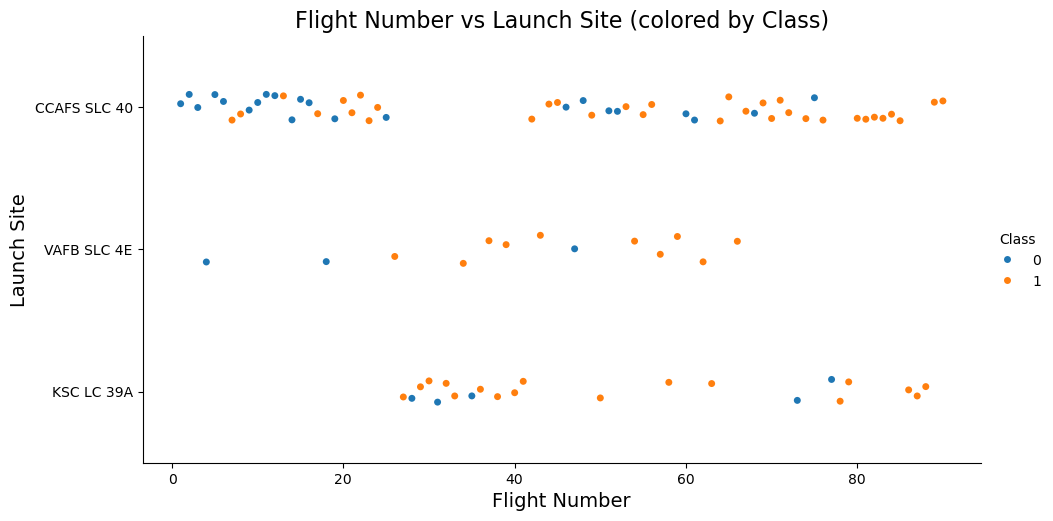

In [14]:
sns.catplot(
    x="FlightNumber",
    y="LaunchSite",
    hue="Class",          # agar error aaye to 'class' try kar lena
    data=df,
    aspect=2,
    height=5
)

plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Flight Number vs Launch Site (colored by Class)", fontsize=16)
plt.show()


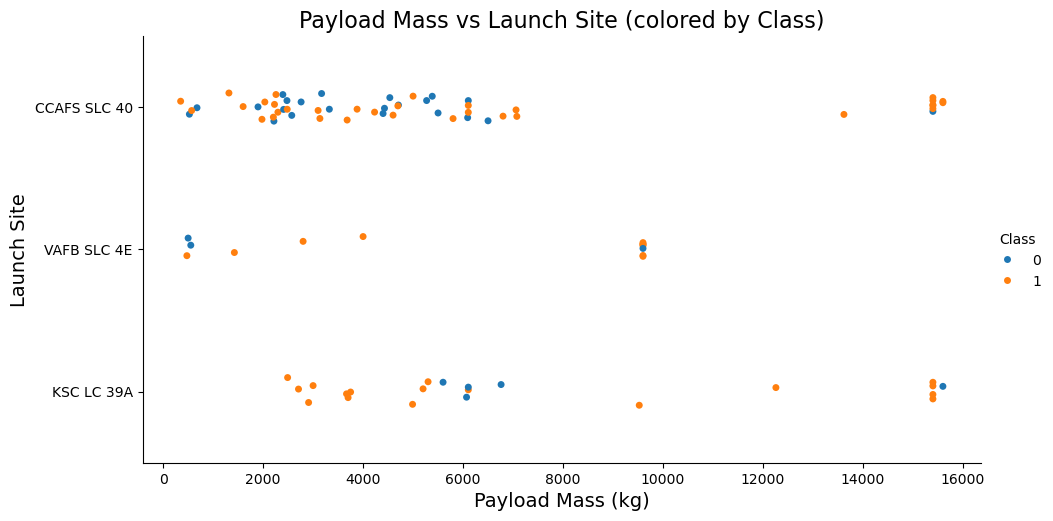

In [15]:
sns.catplot(
    x="PayloadMass",      # x-axis = Payload Mass (kg)
    y="LaunchSite",       # y-axis = Launch Site
    hue="Class",          # color by success (1) / failure (0)
    data=df,
    aspect=2,
    height=5
)

plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Payload Mass vs Launch Site (colored by Class)", fontsize=16)
plt.show()


In [16]:
orbit_success = df.groupby("Orbit")["Class"].mean().reset_index()
orbit_success


,Orbit,Class
0,ES-L1,1.000000
1,GEO,1.000000
2,GTO,0.518519
3,HEO,1.000000
4,ISS,0.619048
5,LEO,0.714286
6,MEO,0.666667
7,PO,0.666667
8,SO,0.000000
9,SSO,1.000000


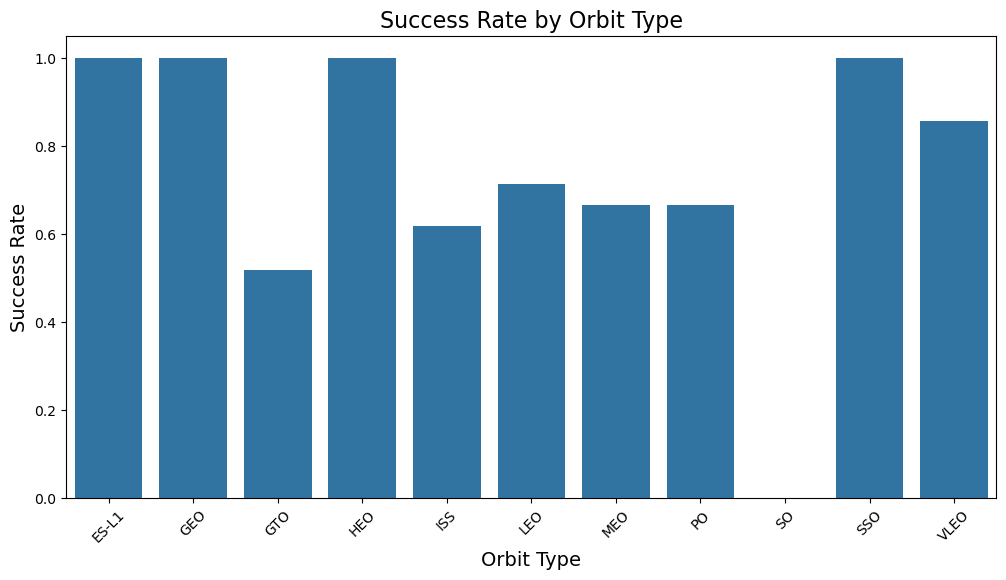

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(x="Orbit", y="Class", data=orbit_success)

plt.xlabel("Orbit Type", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)
plt.title("Success Rate by Orbit Type", fontsize=16)
plt.xticks(rotation=45)
plt.show()


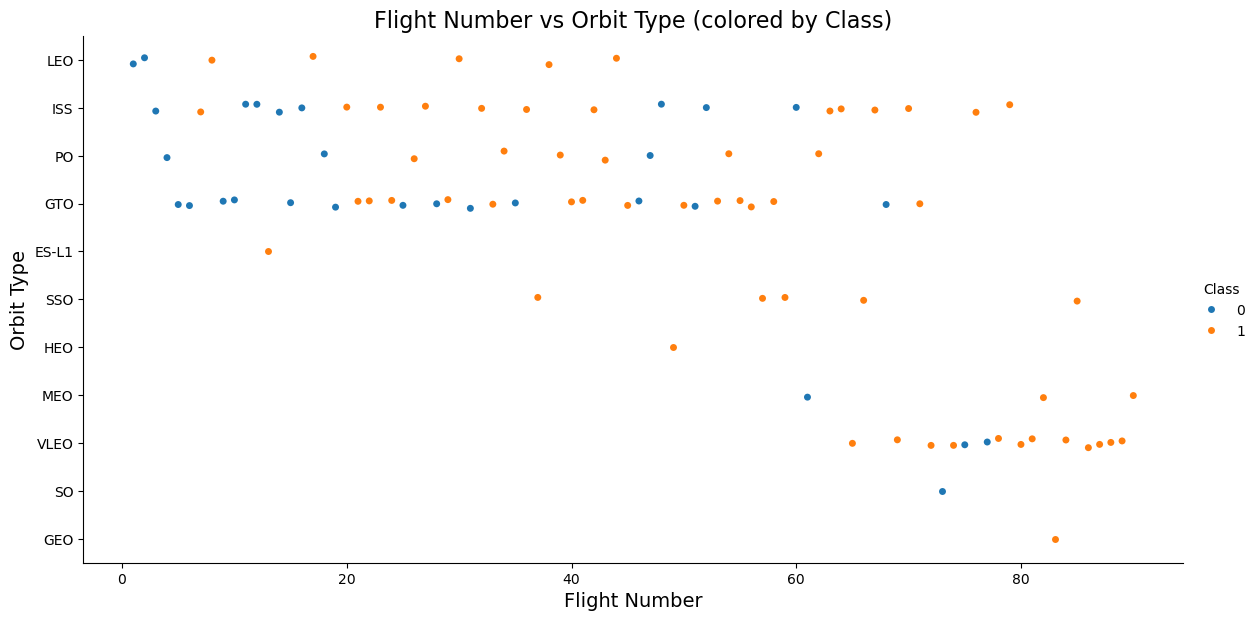

In [18]:
sns.catplot(
    x="FlightNumber",
    y="Orbit",
    hue="Class",        # success = 1, failure = 0
    data=df,
    aspect=2,
    height=6
)

plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Flight Number vs Orbit Type (colored by Class)", fontsize=16)
plt.show()


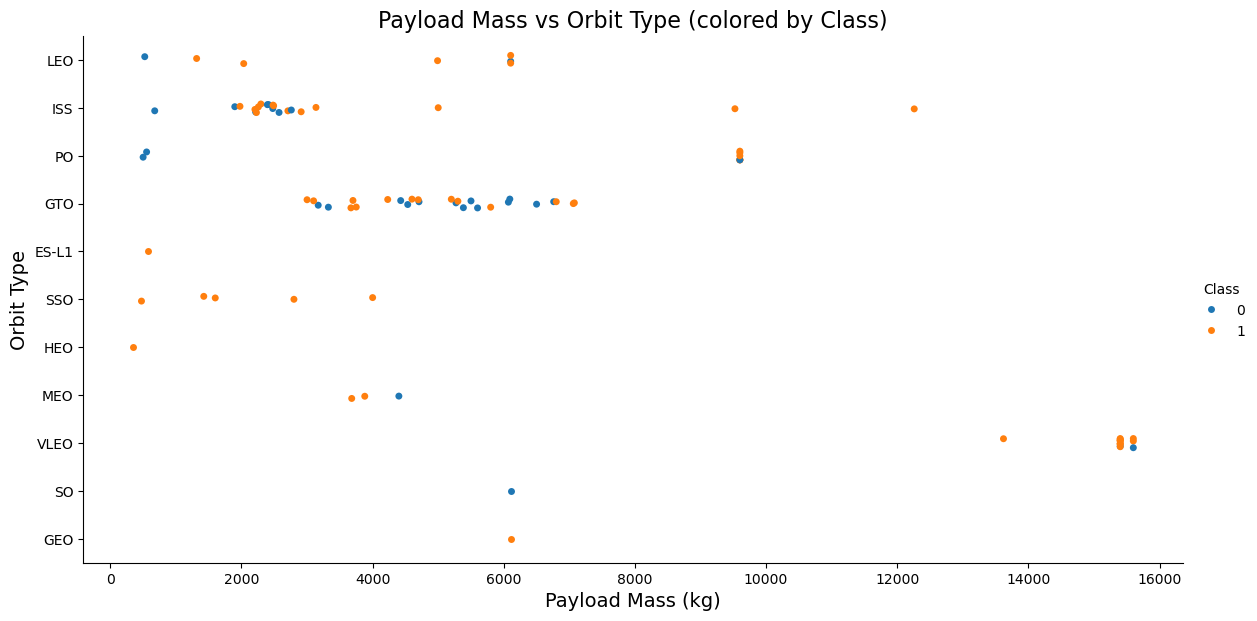

In [19]:
sns.catplot(
    x="PayloadMass",      # x-axis = Payload Mass (kg)
    y="Orbit",            # y-axis = Orbit Type
    hue="Class",          # success (1) / failure (0)
    data=df,
    aspect=2,
    height=6
)

plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Payload Mass vs Orbit Type (colored by Class)", fontsize=16)
plt.show()


In [20]:
year = []

def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])   # date format → YYYY-MM-DD, isliye first part = year
    return year

Extract_year()
df['Year'] = year
df.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


In [21]:
yearly_success = df.groupby("Year")["Class"].mean().reset_index()
yearly_success


,Year,Class
0,2010,0.000000
1,2012,0.000000
2,2013,0.000000
3,2014,0.333333
4,2015,0.333333
5,2016,0.625000
6,2017,0.833333
7,2018,0.611111
8,2019,0.900000
9,2020,0.842105


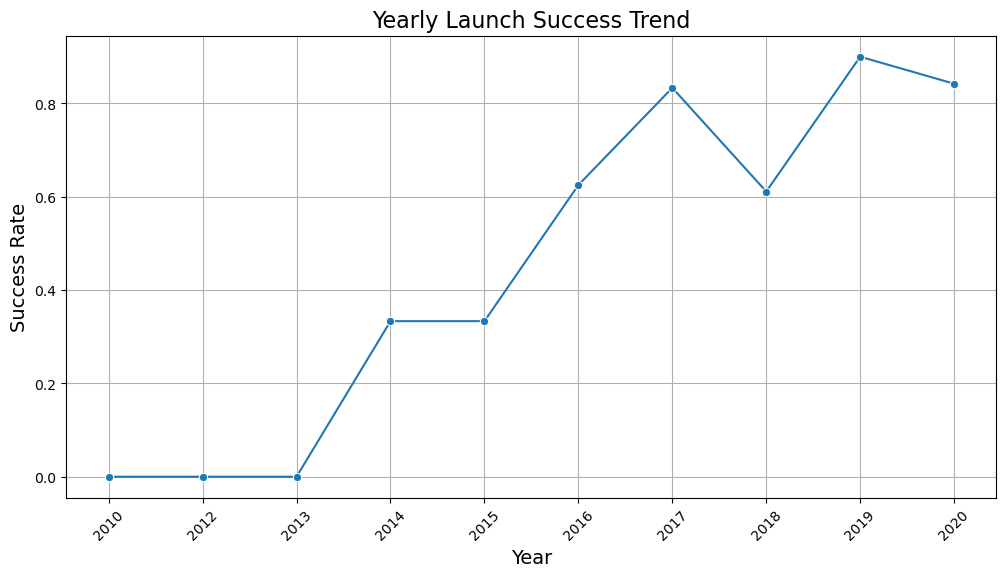

In [22]:
plt.figure(figsize=(12,6))
sns.lineplot(x="Year", y="Class", data=yearly_success, marker="o")

plt.xlabel("Year", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)
plt.title("Yearly Launch Success Trend", fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [23]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [24]:
features_one_hot = pd.get_dummies(
    features,
    columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'],   # categorical columns
    dtype=int
)
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Select features
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights',
               'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block',
               'ReusedCount', 'Serial']]

# One-Hot Encoding for categorical variables
features_one_hot = pd.get_dummies(
    features,
    columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'],
    dtype=int
)

features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df['LaunchSite'].unique()


array(['CCAFS SLC 40', 'VAFB SLC 4E', 'KSC LC 39A'], dtype=object)

In [27]:
df[df['LaunchSite'].str.startswith("CCA")].head(5)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0,2014


In [30]:
df.columns


Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class', 'Year'],
      dtype='object')

In [33]:
avg_payload_f9_v11 = df[df['BoosterVersion'] == 'F9 v1.1']['PayloadMass'].mean()
avg_payload_f9_v11


nan

In [35]:
first_ground_success = df[
    (df['Class'] == 1) & (df['LandingPad'].str.contains("LZ", na=False))
].sort_values(by='Date').head(1)

first_ground_success[['Date', 'LandingPad', 'Class']]


,Date,LandingPad,Class


In [37]:
result = df[
    (df['Class'] == 1) &                                       # successful landing
    (df['LandingPad'].str.contains("DR", na=False)) &          # drone ship landing
    (df['PayloadMass'] > 4000) &
    (df['PayloadMass'] < 6000)
][['BoosterVersion']].drop_duplicates()

result


,BoosterVersion


In [39]:
df['Class'].value_counts()


Class
1    60
0    30
Name: count, dtype: int64

In [40]:
success_count = df[df['Class'] == 1].shape[0]
failure_count = df[df['Class'] == 0].shape[0]

success_count, failure_count


(60, 30)

In [41]:
df['Class'].value_counts().rename(index={1: "Success", 0: "Failure"})


Class
Success    60
Failure    30
Name: count, dtype: int64

In [42]:
max_payload = df['PayloadMass'].max()      # highest payload mass
result = df[df['PayloadMass'] == max_payload][['BoosterVersion', 'PayloadMass']]
result


,BoosterVersion,PayloadMass
68,Falcon 9,15600.0
73,Falcon 9,15600.0
76,Falcon 9,15600.0


In [44]:
# extract year if not already done
df['Year'] = df['Date'].str.split('-').str[0]

failed_drone_2015 = df[
    (df['Class'] == 0) &                                            # failed landing
    (df['LandingPad'].str.contains("DR", na=False)) &               # drone ship landing
    (df['Year'] == '2015')                                          # year 2015
][['LandingPad', 'BoosterVersion', 'LaunchSite', 'Date']]

failed_drone_2015


,LandingPad,BoosterVersion,LaunchSite,Date


In [46]:
df.columns


Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class', 'Year'],
      dtype='object')

In [47]:
# convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# filter date range
df_date_range = df[
    (df['Date'] >= '2010-06-04') &
    (df['Date'] <= '2017-03-20')
]

# count and rank landing outcomes
ranking = df_date_range['Outcome'].value_counts().sort_values(ascending=False)
ranking


Outcome
None None      9
True ASDS      5
False ASDS     4
True RTLS      3
True Ocean     3
False Ocean    2
None ASDS      2
Name: count, dtype: int64